In [31]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras

#dataset
dataset = 10000

np.random.seed(50)

#產生dataset列 X2行的0~1隨機數字
D=np.random.random(size=(dataset,2))
#velocity 假設初速
V=D[:,0]*100
#theta 假設角度
theta=D[:,1]*90

print(V)

#初速平方
v2=pow(V,2)

#sin theta 平方
sin2=pow(np.sin(np.deg2rad(theta)),2)

#sin theta乘 cos theta
sincos=np.multiply(np.sin(np.deg2rad(theta)),np.cos(np.deg2rad(theta)))


#拋物線公式計算Max H & R
H=np.multiply(v2,sin2)/2/9.8
R=2*np.multiply(v2,sincos)/9.8

#將數據重新reshaape
V=np.reshape(V,(dataset,-1))
theta=np.reshape(theta,(dataset,-1))
R=np.reshape(R,(dataset,-1))
H=np.reshape(H,(dataset,-1))


#將數據append一起
dataset2=np.append(V,theta, axis=1)
dataset2=np.append(dataset2,R, axis=1)
dataset2=np.append(dataset2,H, axis=1)
print("    Velocity   ,  theta   ,     Max R ,      Max H")
print(dataset2)


[49.46016455 25.54739238 37.73150977 ... 18.00870614 98.66071516
 10.90266886]
    Velocity   ,  theta   ,     Max R ,      Max H
[[4.94601646e+01 2.05274794e+01 1.63948222e+02 1.53468417e+01]
 [2.55473924e+01 3.56696919e+01 6.30978284e+01 1.13224492e+01]
 [3.77315098e+01 8.96916807e+01 1.56344267e+00 7.26339594e+01]
 ...
 [1.80087061e+01 4.93895554e+00 5.67711782e+00 1.22647291e-01]
 [9.86607152e+01 7.82692502e+01 3.95448880e+02 4.76100703e+02]
 [1.09026689e+01 1.99828951e+00 8.45382204e-01 7.37403213e-03]]


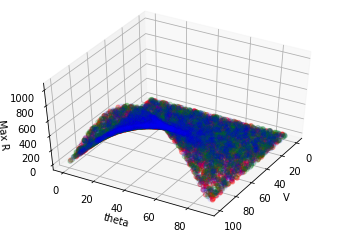

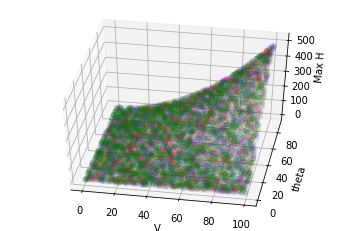

In [32]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')

# 將random數據分成三種顏色繪製
ax.scatter(V[:3000], theta[:3000], R[:3000], c='r',alpha=0.3)  # 繪製數據點
ax.scatter(V[3000:6000], theta[3000:6000], R[3000:6000], c='g',alpha=0.2)
ax.scatter(V[6000:10000], theta[6000:10000], R[6000:10000], c='b',alpha=0.05)
ax.set_zlabel('Max R')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
ax.view_init(45, 30)
plt.savefig('MaxRdata.png',dpi=150)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(V[:3000], theta[:3000], H[:3000], c='r',alpha=0.05)  # 繪製數據點
ax.scatter(V[3000:6000], theta[3000:6000], H[3000:6000], c='g',alpha=0.1)
ax.scatter(V[6000:10000], theta[6000:10000], H[6000:10000], c='b',alpha=0.05)
ax.set_zlabel('Max H')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
ax.view_init(45, -80)
plt.savefig('MaxHdata.png',dpi=150)


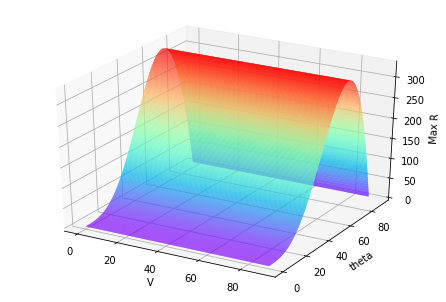

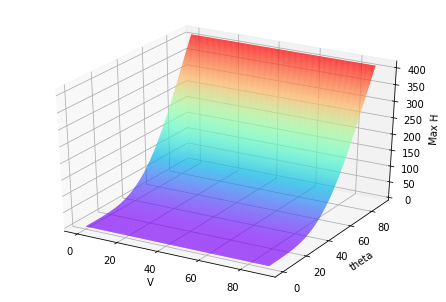

In [33]:
V1 = np.arange(0, 90, 0.25)
theta1 = np.arange(0, 90, 0.25)

#初速平方
v2_2=pow(V1,2)
#sin theta 平方
sin2_2=pow(np.sin(np.deg2rad(theta1)),2)

#sin theta乘 cos theta
sincos_2=np.multiply(np.sin(np.deg2rad(theta1)),np.cos(np.deg2rad(theta1)))

R1=2*np.multiply(v2_2,sincos_2)/9.8
H1=np.multiply(v2_2,sin2_2)/2/9.8

V1=np.reshape(V1,(360,-1))
theta1=np.reshape(theta1,(360,-1))
R1=np.reshape(R1,(360,-1))
H1=np.reshape(H1,(360,-1))

X0, Y0 = np.meshgrid(V1, theta1)    # V-theta 平面的网格
#繪製V-theta- Max R曲面圖
fig3 = plt.figure()
ax = Axes3D(fig3)
ax.plot_surface(X0, Y0, R1, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_zlabel('Max R')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
plt.savefig('MaxR.png',dpi=150)

#繪製V-theta- Max H曲面圖
fig4 = plt.figure()
ax = Axes3D(fig4)
ax.plot_surface(X0, Y0, H1, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_zlabel('Max H')  #坐標軸
ax.set_ylabel('theta')
ax.set_xlabel('V')
plt.savefig('MaxH.png',dpi=150)

In [34]:
#X為已知初速及仰角 Y為結果之Max R&H
X=dataset2[:,:2]
Y=dataset2[:,2:4]

# 建立 trainig 與 testing data
X_train, Y_train = X[:8000], Y[:8000] # 取資料點當中前 80% 筆資料當作 training data
X_test, Y_test = X[8000:], Y[8000:] # 取資料點當中，後 20% 筆資料當作 testing data

In [35]:
model = keras.models.Sequential()

# 定義一個輸入變數，設定一個輸入層及兩個隱藏層
model.add(keras.layers.Dense(2, input_dim=2,kernel_initializer='normal', activation='relu'))    
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(2, activation='relu'))

# https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#compile
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


print( "Training ------------")
# Another way to train the model
model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.1)
# nb_epoch 控制我們要訓練幾次

print( "\nTesting ------------")
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, Y_test)

print( "test loss: {}".format(loss))
print( "test accuracy: {}".format(accuracy))


Training ------------
Train on 7200 samples, validate on 800 samples
Epoch 1/40
7200/7200 [==============================] - 2s 263us/step - loss: 61419.1835 - acc: 0.1842 - val_loss: 57898.3951 - val_acc: 0.1412
Epoch 2/40
7200/7200 [==============================] - 1s 83us/step - loss: 57911.0732 - acc: 0.2267 - val_loss: 54633.4217 - val_acc: 0.1412
Epoch 3/40
7200/7200 [==============================] - 1s 70us/step - loss: 57155.4712 - acc: 0.2926 - val_loss: 54398.6673 - val_acc: 0.1412
Epoch 4/40
7200/7200 [==============================] - 0s 56us/step - loss: 56897.5758 - acc: 0.3007 - val_loss: 54391.0285 - val_acc: 0.1412
Epoch 5/40
7200/7200 [==============================] - 0s 58us/step - loss: 56972.3565 - acc: 0.2853 - val_loss: 54421.9021 - val_acc: 0.1412
Epoch 6/40
7200/7200 [==============================] - 0s 55us/step - loss: 57119.3361 - acc: 0.2982 - val_loss: 54375.1803 - val_acc: 0.1412
Epoch 7/40
7200/7200 [==============================] - 0s 63us/step - l